In [1]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
from cnn_utils import *
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.optimizers import Adam
import seaborn as sns

Using TensorFlow backend.


ModuleNotFoundError: No module named 'seaborn'

## Data Preprocessing

In [2]:
df = create_dataframe('/../raw_data/dataset_062920.json')
df.head()

,eyeImage,leftEye,rightEye,y
0,"[[[0.49019607843137253, 0.4627450980392157, 0....","[-0.06916704732662149, 0.19730078279591035, -0...","[0.17425771877389162, 0.21639015714266296, 0.2...","[-0.30000000000000004, -0.3019517795637199]"
1,"[[[0.19607843137254902, 0.1607843137254902, 0....","[-0.17658285534307594, 0.18033866676032262, -0...","[0.06629549190581052, 0.1988126179958256, 0.10...","[0.30000000000000004, -0.9012629161882894]"
2,"[[[0.2196078431372549, 0.19215686274509805, 0....","[-0.17382043840055927, 0.17981051564675177, -0...","[0.06089991895895852, 0.18628686237123016, 0.0...","[0.8999999999999999, -0.9012629161882894]"
3,"[[[0.2196078431372549, 0.17647058823529413, 0....","[-0.15968611544730582, 0.18524077990937093, -0...","[0.08123800929222913, 0.1904861112443328, 0.11...","[-0.30000000000000004, 0.8989667049368542]"
4,"[[[0.5882352941176471, 0.5647058823529412, 0.6...","[-0.07825260742468576, 0.16963032408957468, -0...","[0.1666792245722788, 0.19617187288354976, 0.20...","[-0.30000000000000004, 0.2996555683122848]"


In [3]:
len(df)

846

### Try to use Quaternary encoding to see if we have mislabelled data

In [4]:
# randomly select training examples
x_train, x_validation, y_train, y_validation = create_train_validation(df)

# generate binary y labels
y_train_binary = create_binary_labels(y_train)
y_validation_binary = create_binary_labels(y_validation) # generate binary y labels

# generate quaternary y labels
y_train_quaternary = create_quaternary_labels(y_train)
y_validation_quaternary = create_quaternary_labels(y_validation) # generate binary y labels


In [5]:
# prepare data for feeding in CNN
eyeImage_train, leftEye_train, rightEye_train, quaternary_train = create_tf_data(x_train, y_train_quaternary)
eyeImage_test, leftEye_test, rightEye_test, quaternary_test = create_tf_data(x_validation, y_validation_quaternary)

In [6]:
quaternary_encoder = LabelEncoder()
quaternary_encoder.fit(quaternary_train)
quaternary_train = quaternary_encoder.transform(quaternary_train)
quaternary_test = quaternary_encoder.transform(quaternary_test)

#### prepare binary data

In [7]:
eyeImage_train, leftEye_train, rightEye_train, binary_train = create_tf_data(x_train, y_train_binary)
eyeImage_test, leftEye_test, rightEye_test, binary_test = create_tf_data(x_validation, y_validation_binary)
# encoding the data
binary_encoder = LabelEncoder()
binary_encoder.fit(binary_train)
binary_train = binary_encoder.transform(binary_train)
binary_test = binary_encoder.transform(binary_test)

# # one-hot encoding the data
# binary_train = to_categorical(binary_train)
# binary_test = to_categorical(binary_test)

In [8]:
binary_train

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,

## Extract Feature in VGG16

In [10]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
# import preprocess_input
import numpy as np
# load the pretrained model
model = VGG16(weights='imagenet', include_top=False) 
# load and preprocess the image
# x = np.expand_dims(x, axis=0) 
# x = preprocess_input(x)
# extract features 
# features = model.predict(eyeImage_test)

In [11]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [12]:
out = model.get_layer('block2_pool').output

In [13]:
model_new = Model(input=model.input, output=out)

In [14]:
model_new.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [15]:
# img_arr = eyeImage_test[0]
features_train = model_new.predict(eyeImage_train)
features_test = model_new.predict(eyeImage_test)

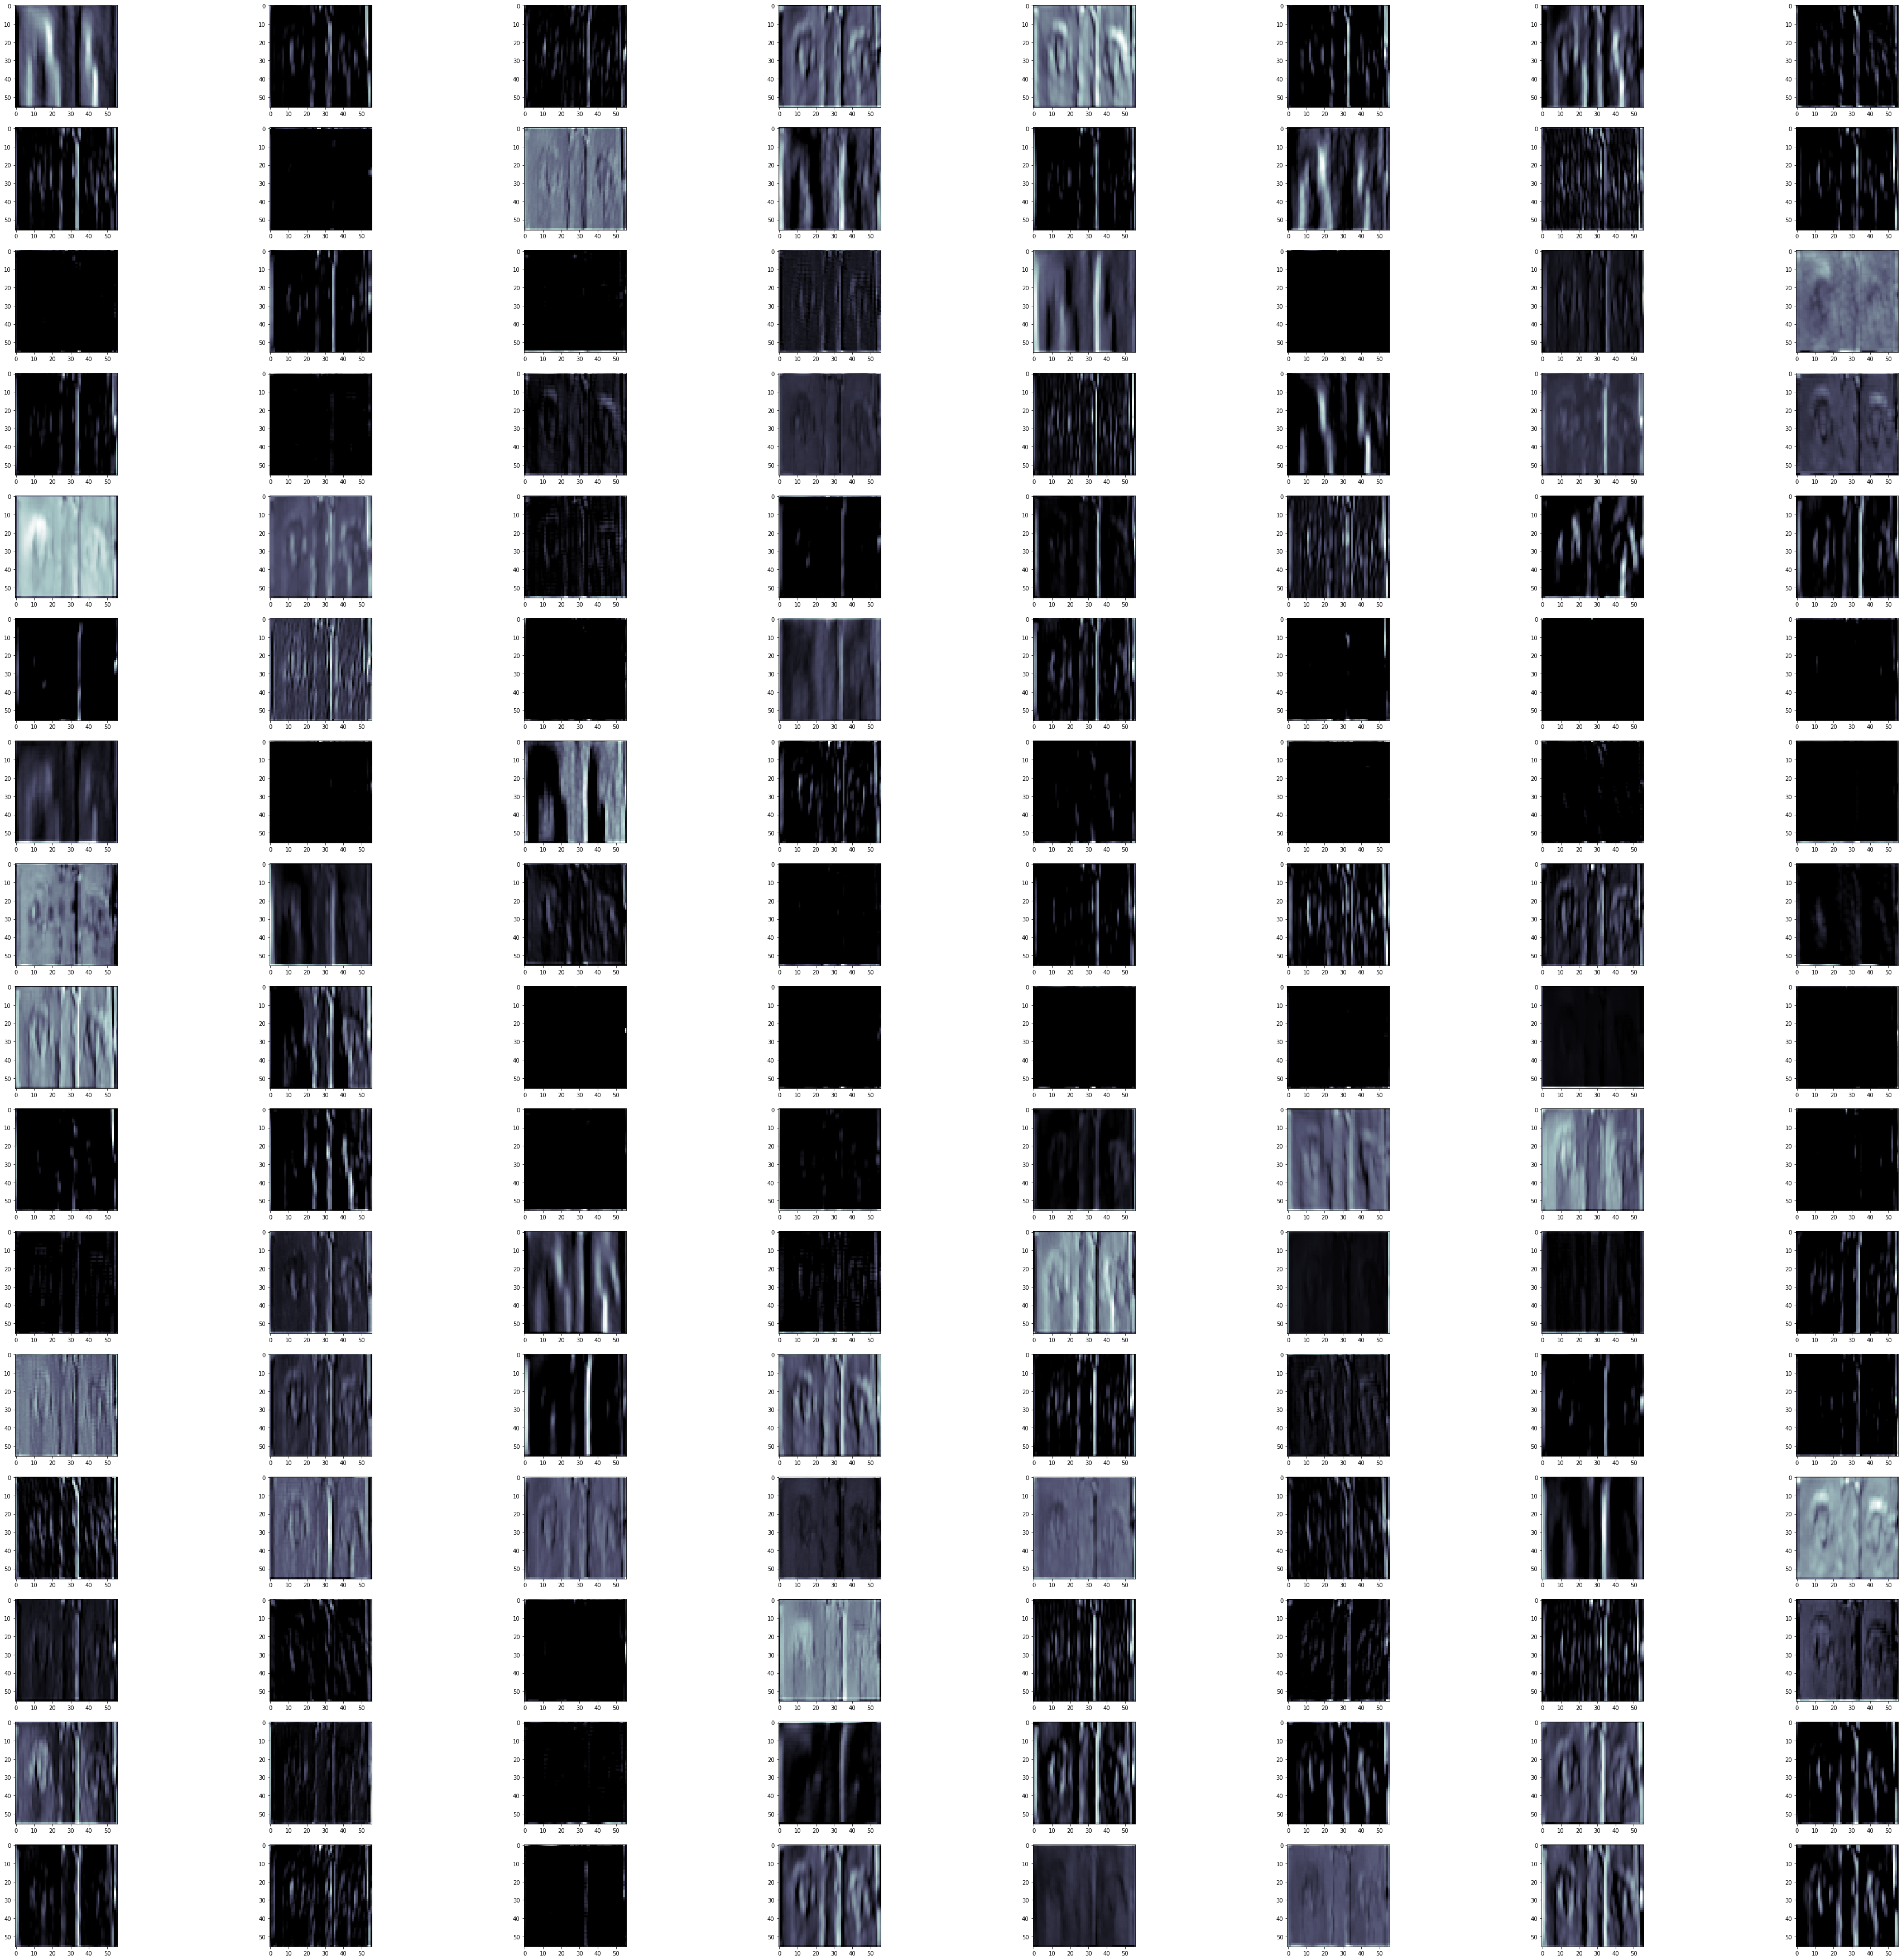

In [16]:
fig, ax = plt.subplots(16, 8,figsize=(64,64))
for i, axi in enumerate(ax.flat):
    axi.imshow(features_train[0,:, :,i], cmap='bone')
fig.savefig("results/layer2_activation.png")

In [17]:
features_train = features_train.reshape(features_train.shape[0],features_train.shape[1]*features_train.shape[2]*features_train.shape[3])

In [18]:
features_test = features_test.reshape(features_test.shape[0],features_test.shape[1]*features_test.shape[2]*features_test.shape[3])

In [19]:
features_test.shape

(169, 401408)

#### Quaternary classification

In [20]:
from sklearn.svm import SVC

SVM = SVC(random_state=42)
SVM.fit(features_train,quaternary_train)  #learning 
#SVM Test 

print ("SVM Accuracy:", SVM.score(features_test,quaternary_test))

SVM Accuracy: 0.5976331360946746


In [21]:
print ("SVM train quaternary Accuracy:", SVM.score(features_train,quaternary_train))

SVM train quaternary Accuracy: 0.7872968980797637


#### Binary classification

In [22]:
SVM_binary = SVC(random_state=42)
SVM_binary.fit(features_train,binary_train)  #learning 
#SVM Test 

print ("SVM binary test Accuracy:", SVM_binary.score(features_test,binary_test))

SVM binary test Accuracy: 0.8816568047337278


In [23]:
print ("SVM binary train Accuracy:", SVM_binary.score(features_train,binary_train))

SVM binary train Accuracy: 0.9409158050221565


## Extract Feature in PCA

In [35]:
eyeImage_train = eyeImage_train.reshape(eyeImage_train.shape[0],eyeImage_train.shape[1]*eyeImage_train.shape[2]*eyeImage_train.shape[3])
eyeImage_test = eyeImage_test.reshape(eyeImage_test.shape[0],eyeImage_test.shape[1]*eyeImage_test.shape[2]*eyeImage_test.shape[3])

In [36]:
eyeImage_train.shape

(677, 150528)

In [37]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=300, whiten=True, random_state=42)
svc = SVC(kernel='linear', class_weight='balanced')
svm_model = make_pipeline(pca, svc)

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 0.5, 0.1, 0.05]#[1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.00005, 0.00001, 0.000005]} #[0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(eyeImage_train, binary_train)
print(grid.best_params_)

CPU times: user 1h 17min 8s, sys: 5min 22s, total: 1h 22min 30s
Wall time: 21min 14s
{'svc__C': 1, 'svc__gamma': 0.0001}


In [39]:
svm_model = grid.best_estimator_
yfit = svm_model.predict(eyeImage_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

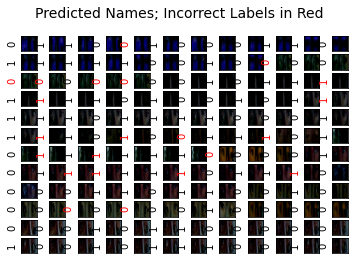

In [51]:
fig, ax = plt.subplots(12, 12)
for i, axi in enumerate(ax.flat):
    axi.imshow(eyeImage_test[i].reshape(224, 224, 3), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(yfit[i],
                   color='black' if yfit[i] == binary_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(binary_test, yfit))

precision    recall  f1-score   support

           0       0.88      0.84      0.86        89
           1       0.83      0.88      0.85        80

    accuracy                           0.86       169
   macro avg       0.86      0.86      0.86       169
weighted avg       0.86      0.86      0.86       169



In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(binary_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
mat

array([[75, 14],
       [10, 70]])

In [52]:
eyeImage_test[10]

array([-0.15289477, -0.07307112,  0.03053719, ..., -0.14298643,
       -0.14806822, -0.19078779])

In [64]:
binary_test[12]

1

In [59]:
eyeImage_test[10].reshape(1,eyeImage_test[10].shape[0])

(1, 150528)

In [63]:
model.predict(eyeImage_test[12].reshape(1,eyeImage_test[10].shape[0]))

array([1])